In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.7.1+cpu
0.22.1+cpu


In [4]:
train_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=True,  # Do we want the training dataset?
    download = True,  #Do we want to download it?
    transform=ToTensor(), # How do we transform the data?
    target_transform=None  # How do we transform the labels/targets?
)
test_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=False,  # Do we want the training dataset?
    download = True,  #Do we want to download it?
    transform=ToTensor(), # How do we transform the data?
    target_transform=None  # How do we transform the labels/targets?
)

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
image, label = train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names = train_data.classes
class_names
# ['T-shirt/top',
#  'Trouser',
#  'Pullover',
#  'Dress',
#  'Coat',
#  'Sandal',
#  'Shirt',
#  'Sneaker',
#  'Bag',
#  'Ankle boot']

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx
# {'T-shirt/top': 0,
#  'Trouser': 1,
#  'Pullover': 2,
#  'Dress': 3,
#  'Coat': 4,
#  'Sandal': 5,
#  'Shirt': 6,
#  'Sneaker': 7,
#  'Bag': 8,
#  'Ankle boot': 9}   returns a dict with class and index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [11]:
image.shape, label
print(f"Image shape: {image.shape} -> [color channels, height, width]")
print(f"Label shape: {class_names[label]}")
# Image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
# Label shape: Ankle boot

Image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
Label shape: Ankle boot


Text(0.5, 1.0, '9')

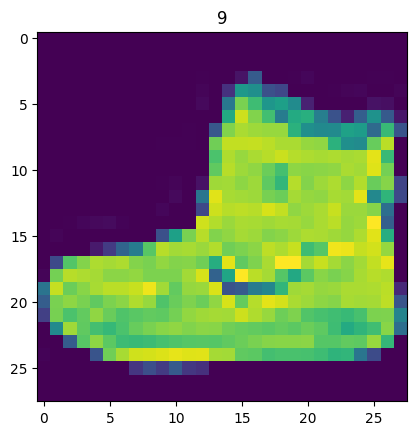

In [15]:
# Visualizing our data
# matplotlib expects [H, W, C] while our data is in [C, H, W]
# However, since our image is greyscale and C is 1, we can
# Squeeze it out
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

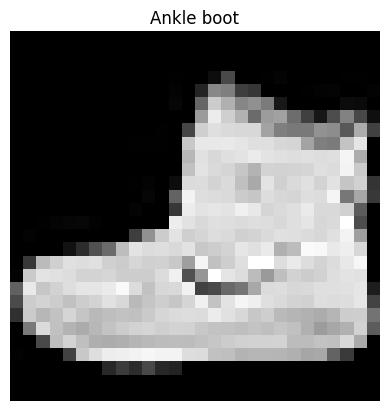

In [18]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis('off')

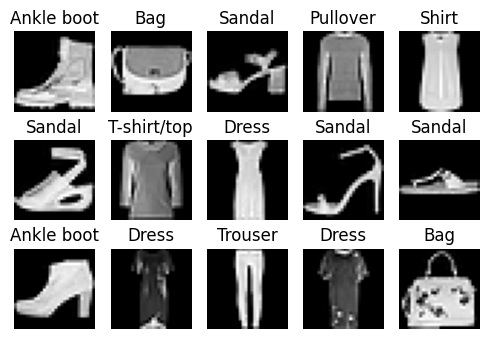

In [32]:
# Plot more images
torch.manual_seed(45)
fig = plt.figure(figsize=(6,4))
rows, cols = 3,5
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)